In [8]:
import pandas as pd

data = pd.read_csv('raw_data.csv')

data

C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\2546669556.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw_data.csv')


,Unnamed: 0,CLinea,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches
0,0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,01/01/2019,H07,070000 - 075959,2.0
1,1,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,01/01/2019,H08,080000 - 085959,3.0
2,2,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,01/01/2019,H09,090000 - 095959,3.0
3,3,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,01/01/2019,H10,100000 - 105959,4.0
4,4,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,01/01/2019,H11,110000 - 115959,4.0
...,...,...,...,...,...,...,...,...
3866431,3866431,781,SE,ATOCHA - NUEVOS MINISTERIOS,29/08/2021,H20,200000 - 205959,5.0
3866432,3866432,781,SE,ATOCHA - NUEVOS MINISTERIOS,29/08/2021,H21,210000 - 215959,5.0
3866433,3866433,781,SE,ATOCHA - NUEVOS MINISTERIOS,29/08/2021,H22,220000 - 225959,5.0
3866434,3866434,781,SE,ATOCHA - NUEVOS MINISTERIOS,29/08/2021,H23,230000 - 235959,5.0


In [9]:
data.drop(columns=['Unnamed: 0', 'CLinea'], inplace=True)

In [10]:
data['FServicio'] = pd.to_datetime(data['FServicio'], format="%d/%m/%Y")

# Filter the DataFrame to include only dates from the year 2021
new_df = data[data['FServicio'].dt.year == 2021]
new_df

,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches
2572092,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H07,070000 - 075959,2.0
2572093,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H08,080000 - 085959,3.0
2572094,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H09,090000 - 095959,3.0
2572095,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H10,100000 - 105959,4.0
2572096,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H11,110000 - 115959,4.0
...,...,...,...,...,...,...
3866431,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H20,200000 - 205959,5.0
3866432,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H21,210000 - 215959,5.0
3866433,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H22,220000 - 225959,5.0
3866434,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H23,230000 - 235959,5.0


In [20]:
nm = new_df['Coches'] = new_df['Coches'].astype(int)
nm

C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\1975109967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm = new_df['Coches'] = new_df['Coches'].astype(int)


2572092    2
2572093    3
2572094    3
2572095    4
2572096    4
          ..
3866431    5
3866432    5
3866433    5
3866434    5
3866435    4
Name: Coches, Length: 1294344, dtype: int32

In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Intervalo' is the name of the column containing time intervals
# Extract the first time value from the interval
new_df['Intervalo'] = data['Intervalo'].str.split(' - ').str[0]

# Convert the time value to 24-hour format
new_df['24_hour'] = pd.to_datetime(new_df['Intervalo'], format='%H%M%S').dt.strftime('%H:%M:%S')


C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\853082468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Intervalo'] = data['Intervalo'].str.split(' - ').str[0]
C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\853082468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['24_hour'] = pd.to_datetime(new_df['Intervalo'], format='%H%M%S').dt.strftime('%H:%M:%S')


In [23]:
new_df

,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches,24_hour
2572092,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H07,070000,2,07:00:00
2572093,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H08,080000,3,08:00:00
2572094,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H09,090000,3,09:00:00
2572095,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H10,100000,4,10:00:00
2572096,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021-01-01,H11,110000,4,11:00:00
...,...,...,...,...,...,...,...
3866431,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H20,200000,5,20:00:00
3866432,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H21,210000,5,21:00:00
3866433,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H22,220000,5,22:00:00
3866434,SE,ATOCHA - NUEVOS MINISTERIOS,2021-08-29,H23,230000,5,23:00:00


In [24]:
# Convert 'FServicio' to datetime format if it's not already in datetime format
new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])

# Group by date and sum the number of buses for each day
daily_bus_count = new_df.groupby(['FServicio', 'Denominacion'])['Coches'].sum()
#(['FServicio', 'Denominacion'])['Coches'].sum()

# Print the total number of buses on each day
print(daily_bus_count)


FServicio   Denominacion                                   
2021-01-01  ALSACIA - EL CAÑAVERAL                              34
            ATOCHA - BARRIO DE GOYA                             50
            ATOCHA - BATAN                                      69
            ATOCHA - CAMPAMENTO                                 63
            ATOCHA - CARABANCHEL ALTO                           70
                                                              ... 
2021-12-31  SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR       31
            TRIBUNAL - ALFONSO XIII                            103
            TRIBUNAL - PLAZA DE CASTILLA                        60
            VILLAVERDE ALTO - POLIGONO INDUSTRIAL LA RESINA     32
            VILLAVERDE ALTO - VICALVARO                         92
Name: Coches, Length: 73390, dtype: int32


C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\1588537841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])


In [65]:
daily_bus_count.max()
mean = daily_bus_count.mean().round()
maxi = daily_bus_count.max()
mini = daily_bus_count.min()
median = daily_bus_count.median()


mean, maxi, mini, median

(107.0, 420, 2, 93.0)

In [25]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'FServicio' to datetime format if it's not already in datetime format
new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])

# Filter the DataFrame for the first day of 2021
first_day_2021 = new_df[new_df['FServicio'] == '2021-01-01']

# Group by 'Denominacion' (road) and sum the number of buses ('Coches') for each road
bus_count_by_road = first_day_2021.groupby('Denominacion')['Coches'].sum()

# Print the total number of buses for each road
print("Total number of buses for each road on the first day of 2021:")
print(bus_count_by_road)

# Print all buses that are out on the first day of 2021 by each road
print("\nBuses out on the first day of 2021 by each road:")
print(first_day_2021[['Denominacion', '24_hour', 'Coches']])

Total number of buses for each road on the first day of 2021:
Denominacion
ALSACIA - EL CAÑAVERAL                           34
ATOCHA - BARRIO DE GOYA                          50
ATOCHA - BATAN                                   69
ATOCHA - CAMPAMENTO                              63
ATOCHA - CARABANCHEL ALTO                        70
                                                 ..
SEVILLA - MONCLOA                                48
SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR    17
TRIBUNAL - ALFONSO XIII                          62
TRIBUNAL - PLAZA DE CASTILLA                     49
VILLAVERDE ALTO - VICALVARO                      65
Name: Coches, Length: 193, dtype: int32

Buses out on the first day of 2021 by each road:
                                     Denominacion   24_hour  Coches
2572092         PLAZA DE CRISTO REY - PROSPERIDAD  07:00:00       2
2572093         PLAZA DE CRISTO REY - PROSPERIDAD  08:00:00       3
2572094         PLAZA DE CRISTO REY - PROSPERIDAD  09:00:00

C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\742884728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])


In [76]:
import pandas as pd

# Convert 'FServicio' to datetime format if it's not already in datetime format
new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])

# Filter the DataFrame for the first day of 2021
first_day_2021 = new_df[new_df['FServicio'] == '2021-01-01']

# Group by 'Denominacion' (road) and sum the number of buses ('Coches') for each road
bus_count_by_road = first_day_2021.groupby('Denominacion')['Coches'].sum()

# Convert the total number of buses for each road to a DataFrame
bus_count_by_road_df = pd.DataFrame(bus_count_by_road).reset_index()
bus_count_by_road_df.columns = ['Denominacion', 'Total Buses']

# Print the total number of buses for each road DataFrame
print("Total number of buses for each road on the first day of 2021:")
display(bus_count_by_road_df)

# Print all buses that are out on the first day of 2021 by each road DataFrame
print("\nBuses out on the first day of 2021 by each road:")
display(first_day_2021[['Denominacion', '24_hour', 'Coches']])

Total number of buses for each road on the first day of 2021:


C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\3347877422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FServicio'] = pd.to_datetime(new_df['FServicio'])


,Denominacion,Total Buses
0,ALSACIA - EL CAÑAVERAL,34
1,ATOCHA - BARRIO DE GOYA,50
2,ATOCHA - BATAN,69
3,ATOCHA - CAMPAMENTO,63
4,ATOCHA - CARABANCHEL ALTO,70
...,...,...
188,SEVILLA - MONCLOA,48
189,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,17
190,TRIBUNAL - ALFONSO XIII,62
191,TRIBUNAL - PLAZA DE CASTILLA,49



Buses out on the first day of 2021 by each road:


,Denominacion,24_hour,Coches
2572092,PLAZA DE CRISTO REY - PROSPERIDAD,07:00:00,2
2572093,PLAZA DE CRISTO REY - PROSPERIDAD,08:00:00,3
2572094,PLAZA DE CRISTO REY - PROSPERIDAD,09:00:00,3
2572095,PLAZA DE CRISTO REY - PROSPERIDAD,10:00:00,4
2572096,PLAZA DE CRISTO REY - PROSPERIDAD,11:00:00,4
...,...,...,...
3196189,PRINCIPE PIO - PINAR DE SAN JOSE,20:00:00,1
3196508,ATOCHA - POLIGONO INDUSTRIAL DE VALLECAS,08:00:00,1
3196509,ATOCHA - POLIGONO INDUSTRIAL DE VALLECAS,09:00:00,1
3196510,ATOCHA - POLIGONO INDUSTRIAL DE VALLECAS,21:00:00,1


In [93]:
#new_df2 = bus_count_by_road_df
new_df2['Total Buses'].sum()

10205

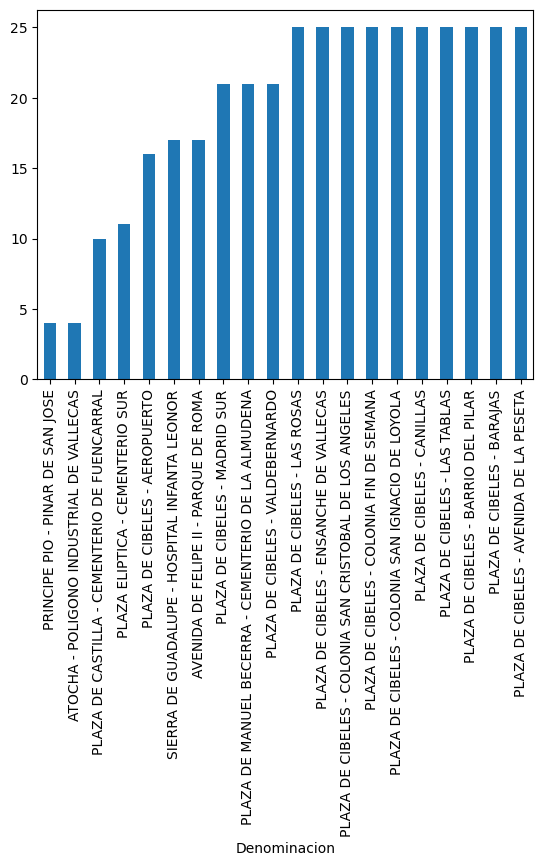

In [83]:
new_df2.groupby('Denominacion')['Total Buses'].mean().sort_values(ascending=True).head(20).plot(kind='bar');

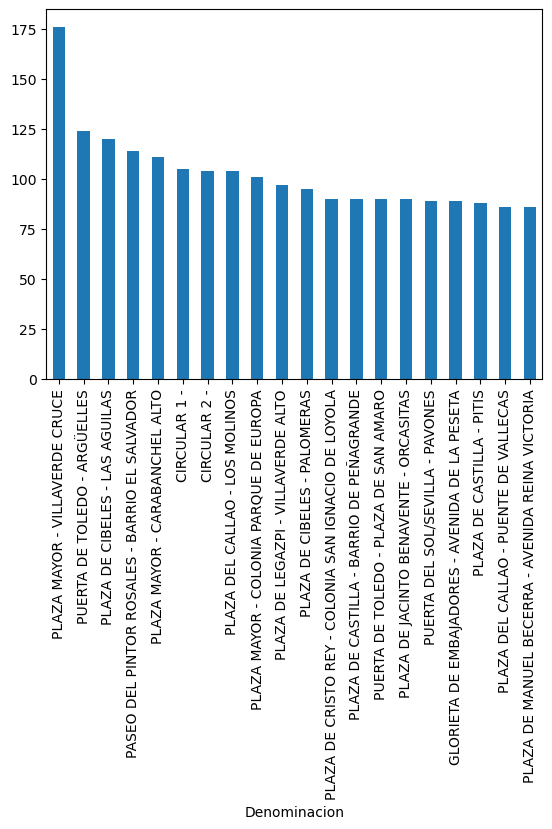

In [87]:
new_df2.groupby('Denominacion')['Total Buses'].mean().sort_values(ascending=False).head(20).plot(kind='bar');

In [26]:
import pandas as pd

def sum_coches_by_day(df):
    # Convertir la columna 'IDFranja' a formato de fecha
    df['FServicio'] = pd.to_datetime(df['FServicio'], format='%d/%m/%Y')

    # Filtrar las filas correspondientes al año 2021
    df_2021 = df[df['FServicio'].dt.year == 2021]

    # Agrupar los datos por día y sumar los valores de la columna 'Coches'
    daily_sum = df_2021.groupby(df_2021['FServicio'].dt.day)['Coches'].sum()

    return daily_sum

# Ejemplo de uso:
# Supongamos que 'df' es tu DataFrame
# daily_coches_sum = sum_coches_by_day(df)


In [27]:
import pandas as pd

def sum_coches_by_month(df):
    # Convertir la columna 'IDFranja' a formato de fecha
    df['FServicio'] = pd.to_datetime(df['FServicio'], format='%d/%m/%Y')

    # Filtrar las filas correspondientes al año 2021
    df_2021 = df[df['FServicio'].dt.year == 2021]

    # Agrupar los datos por mes y sumar los valores de la columna 'Coches'
    monthly_sum = df_2021.groupby(df_2021['FServicio'].dt.month)['Coches'].sum()

    return monthly_sum

# Ejemplo de uso:
# Supongamos que 'df' es tu DataFrame
# monthly_coches_sum = sum_coches_by_month(df)

In [86]:
by_month = sum_coches_by_month(new_df)
by_month

C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\815437048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FServicio'] = pd.to_datetime(df['FServicio'], format='%d/%m/%Y')


FServicio
1     516272
2     669074
3     734681
4     696253
5     700146
6     694509
7     619911
8     478722
9     654934
10    701976
11    687440
12    672354
Name: Coches, dtype: int32

In [146]:
by_day = sum_coches_by_day(new_df)
by_day

C:\Users\sofia\AppData\Local\Temp\ipykernel_44572\4069335539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FServicio'] = pd.to_datetime(df['FServicio'], format='%d/%m/%Y')


FServicio
1     240786
2     259853
3     246394
4     263336
5     272598
6     233374
7     260161
8     275768
9     243458
10    247768
11    237130
12    235893
13    241341
14    241729
15    272184
16    264971
17    256616
18    256391
19    255905
20    264252
21    262610
22    291873
23    272429
24    251633
25    259204
26    270118
27    260642
28    260445
29    260236
30    240387
31    126787
Name: Coches, dtype: int32

In [39]:
lista_top_20_min = new_df.Denominacion.value_counts(ascending=True).head(20).index

top_20_min = new_df[new_df.Denominacion.isin(lista_top_20)]

top_20_min.head()

,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches,24_hour
3085154,180,PLAZA DE LEGAZPI - CAJA MAGICA,2021-04-27,H10,100000,1,10:00:00
3085155,180,PLAZA DE LEGAZPI - CAJA MAGICA,2021-04-27,H11,110000,1,11:00:00
3085156,180,PLAZA DE LEGAZPI - CAJA MAGICA,2021-04-27,H12,120000,1,12:00:00
3085157,180,PLAZA DE LEGAZPI - CAJA MAGICA,2021-04-27,H13,130000,1,13:00:00
3085158,180,PLAZA DE LEGAZPI - CAJA MAGICA,2021-04-27,H14,140000,1,14:00:00


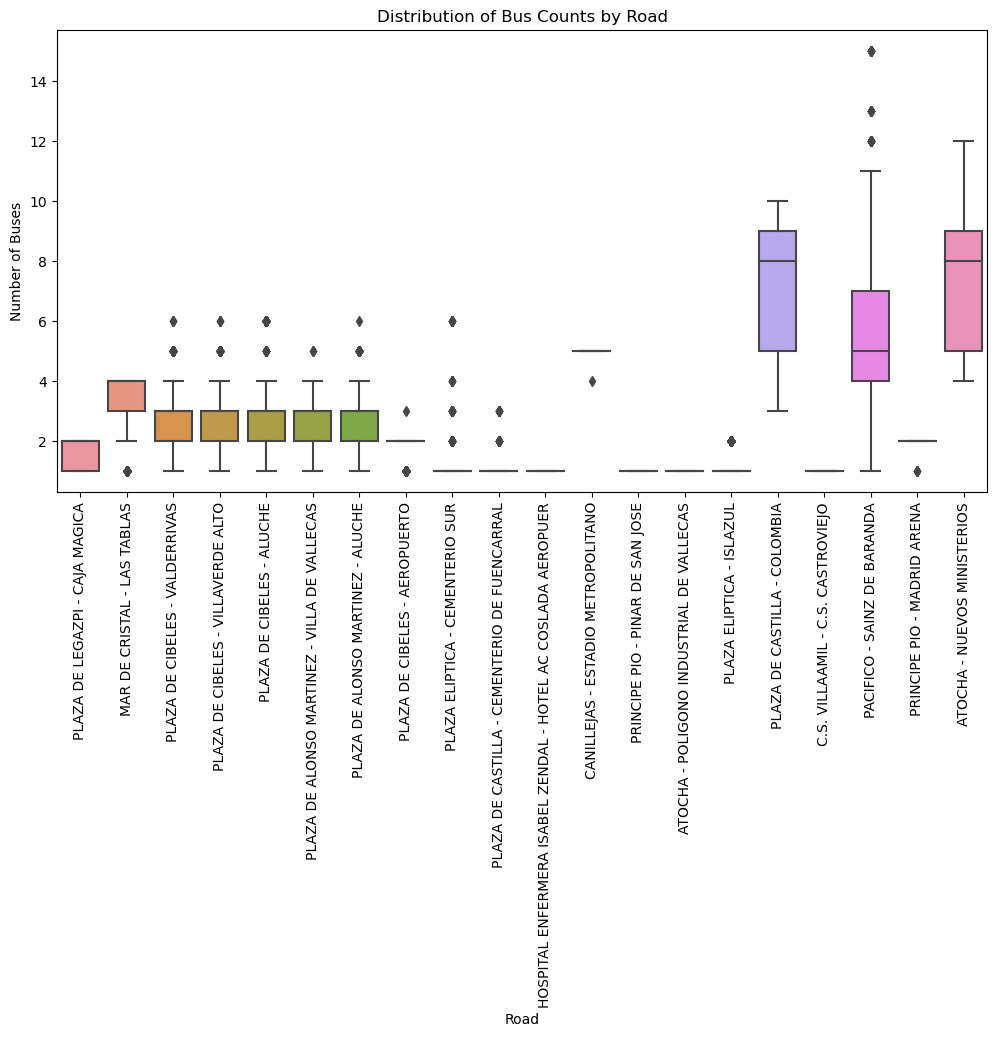

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_20, x='Denominacion', y='Coches')
plt.xticks(rotation=90)
plt.title('Distribution of Bus Counts by Road')
plt.xlabel('Road')
plt.ylabel('Number of Buses')
plt.show()

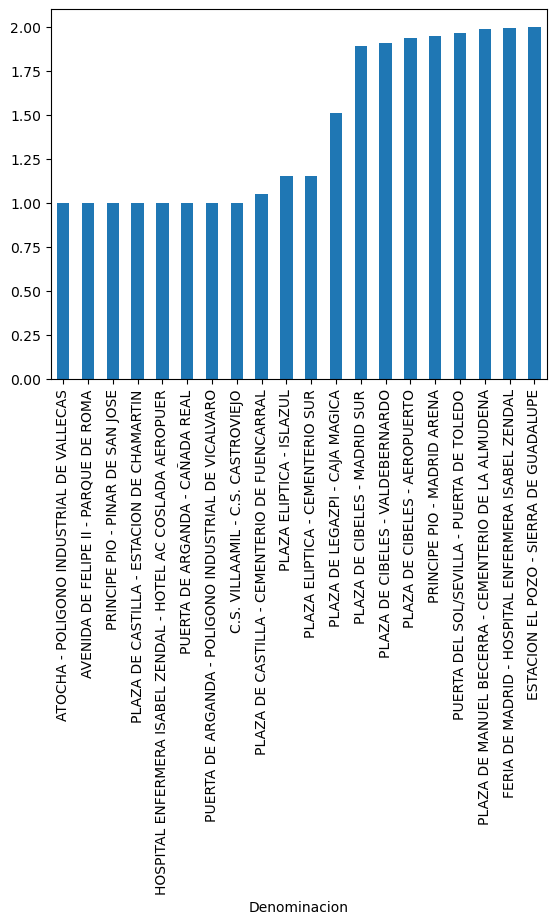

In [49]:
new_df.groupby('Denominacion')['Coches'].mean().sort_values(ascending=True).head(20).plot(kind='bar');

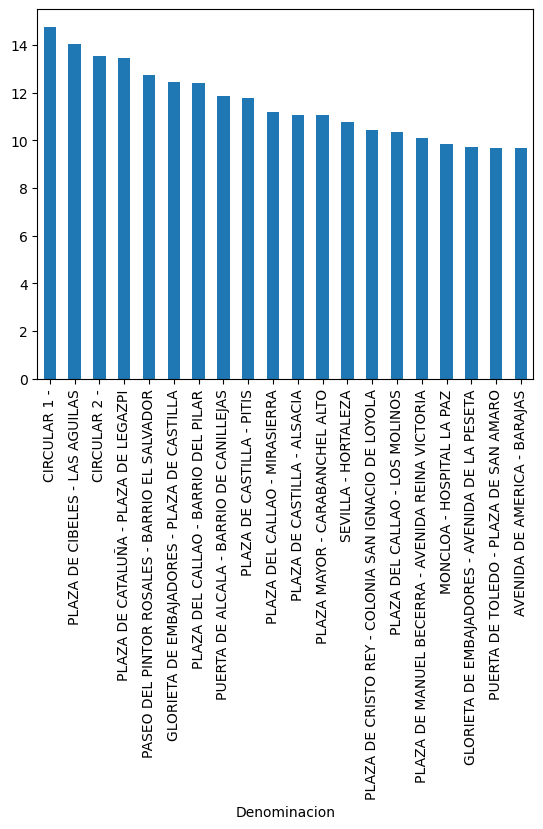

In [50]:
new_df.groupby('Denominacion')['Coches'].mean().sort_values(ascending=False).head(20).plot(kind='bar');

In [34]:
lista_top_20 = new_df.Denominacion.value_counts().head(20).index

top_20 = new_df[new_df.Denominacion.isin(lista_top_20)]

top_20.head()

,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches,24_hour
2581955,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2021-01-01,H07,070000,2,07:00:00
2581956,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2021-01-01,H08,080000,3,08:00:00
2581957,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2021-01-01,H09,090000,4,09:00:00
2581958,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2021-01-01,H10,100000,4,10:00:00
2581959,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2021-01-01,H11,110000,4,11:00:00


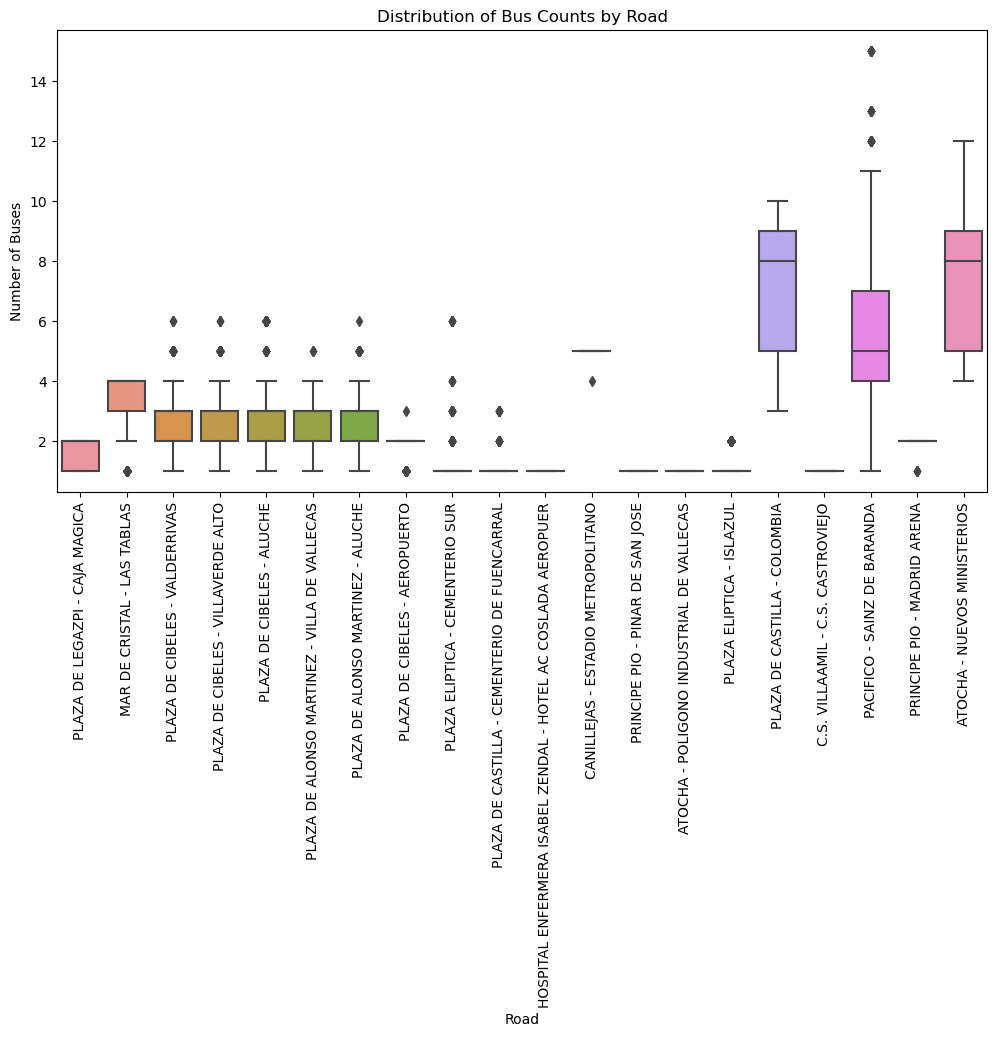

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_20_min, x='Denominacion', y='Coches')
plt.xticks(rotation=90)
plt.title('Distribution of Bus Counts by Road')
plt.xlabel('Road')
plt.ylabel('Number of Buses')
plt.show()

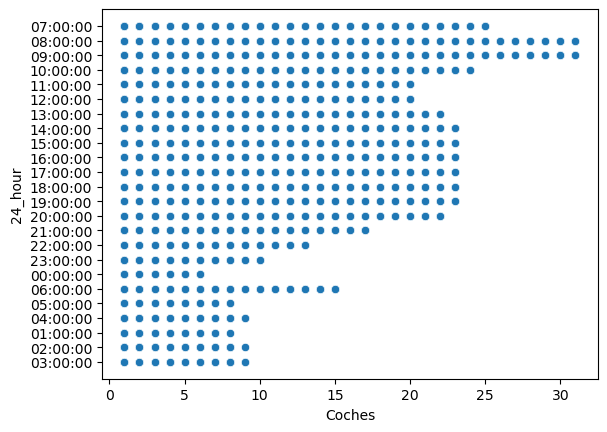

In [54]:
sns.scatterplot(x=new_df.Coches, y=new_df['24_hour']);

In [99]:
new_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Buses,193.0,52.875648,24.765254,4.0,35.0,49.0,65.0,176.0


In [100]:
new_df['Coches'].describe().T

count    1.294344e+06
mean     6.046516e+00
std      4.057934e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      3.100000e+01
Name: Coches, dtype: float64

In [102]:
media = new_df.Coches.mean()

std = (sum([(e-media)**2 for e in new_df.Coches]) / new_df.shape[0]) ** 0.5

std

4.057932179782021

In [122]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(new_df(new_df[new_df == 'Coches'],  axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')


TypeError: 'DataFrame' object is not callable

<Figure size 1000x600 with 0 Axes>

C:\Users\sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


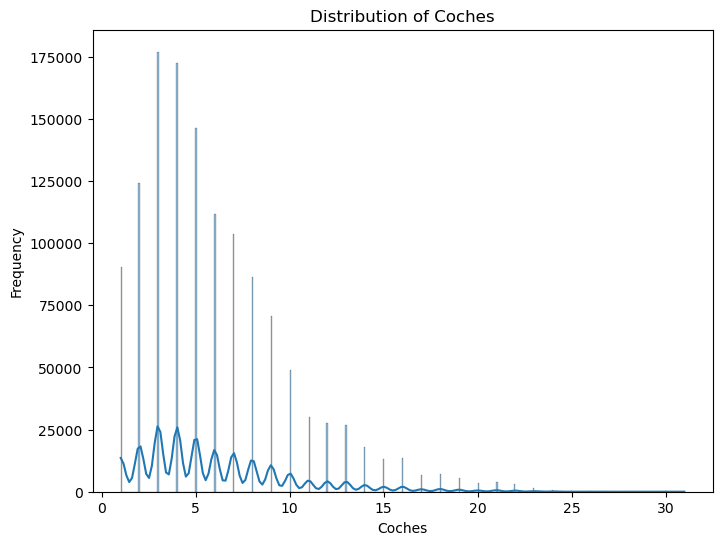

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
# Replace 'data.csv' with the actual filename or filepath
#df = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
#print(df.head())

# Summary Statistics
#print(df.describe())

# Data Cleaning
# Check for missing values
#print(df.isnull().sum())

# Data Visualization
# Distribution of 'Coches'
plt.figure(figsize=(8, 6))
sns.histplot(new_df['Coches'], kde=True)
plt.title('Distribution of Coches')
plt.xlabel('Coches')
plt.ylabel('Frequency')
plt.show()






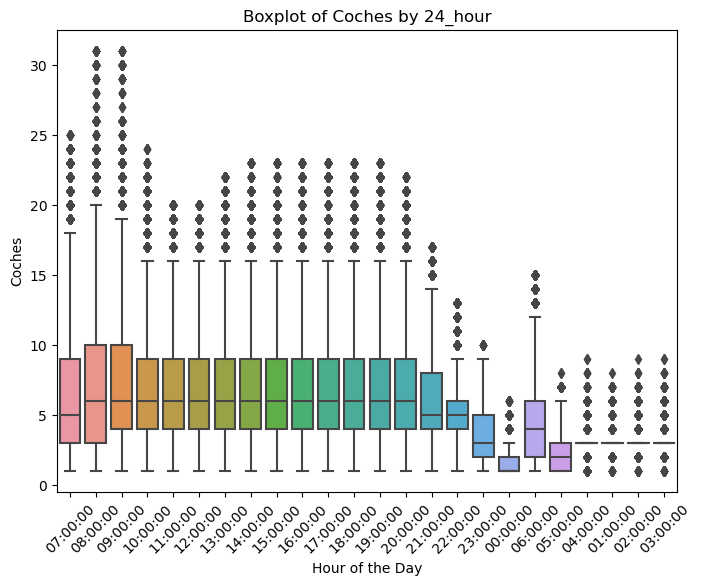

In [125]:

# Relationship between 'Coches' and '24_hour'
plt.figure(figsize=(8, 6))
sns.boxplot(x='24_hour', y='Coches', data=new_df)
plt.title('Boxplot of Coches by 24_hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Coches')
plt.xticks(rotation=45)
plt.show()

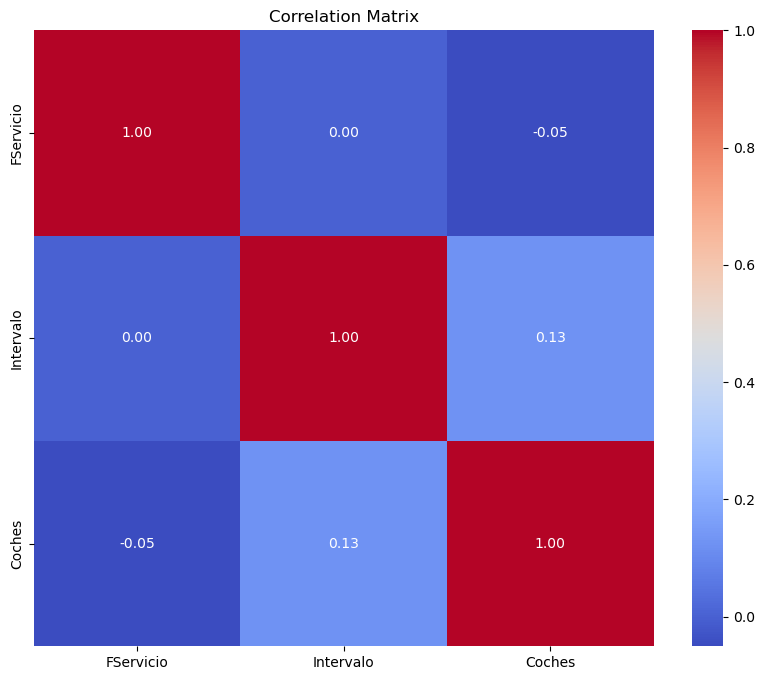

In [134]:
# Correlation Analysis
correlation_matrix = new_df.drop(['Elinea', 'Denominacion', 'IDFranja', '24_hour'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [144]:
# Hypothesis Testing (example: t-test)
from scipy.stats import ttest_ind
group1 = new_df[new_df['24_hour'] == '07:00:00']['Coches']
group2 = new_df[new_df['24_hour'] == '08:00:00']['Coches']
t_statistic, p_value = ttest_ind(group1, group2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -34.285543461563584
p-value: 1.7953520408379335e-256


In [118]:
new_df.to_csv('bus.csv', index=False)